In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
import linAlgVis

# <font face="gotham" color="purple"> 基 </font>

**基座标**，记作 $B$，是用户自定义坐标的最小单位，它是笛卡尔坐标系以外的任何类型的坐标系。

## <font face="gotham" color="purple">  $\mathbb{R}^2$ 的基 </font>

严格来说，基座标是向量空间 $V$ 中的一组向量 $B$，具有两个条件：
1. $B$ 中的所有向量是线性无关的。
2. $\text{span}(B)=V$

我们在之前的章节中已经见过 _标准基座标_，例如在 $\mathbb{R}^2$ 中
$$e_1=
\left[
\begin{matrix}
1\\0
\end{matrix}
\right],
\ e_2=\left[
\begin{matrix}
0\\1
\end{matrix}
\right]
$$

在$\mathbb{R}^3$中

$$e_1=
\left[
\begin{matrix}
1\\0\\0
\end{matrix}
\right],
\ e_2=\left[
\begin{matrix}
0\\1\\0
\end{matrix}
\right],
\ e_3=\left[
\begin{matrix}
0\\0\\1
\end{matrix}
\right]
$$

这里我们展示了向量 $(3, 6)$ 的标准基底的线性组合

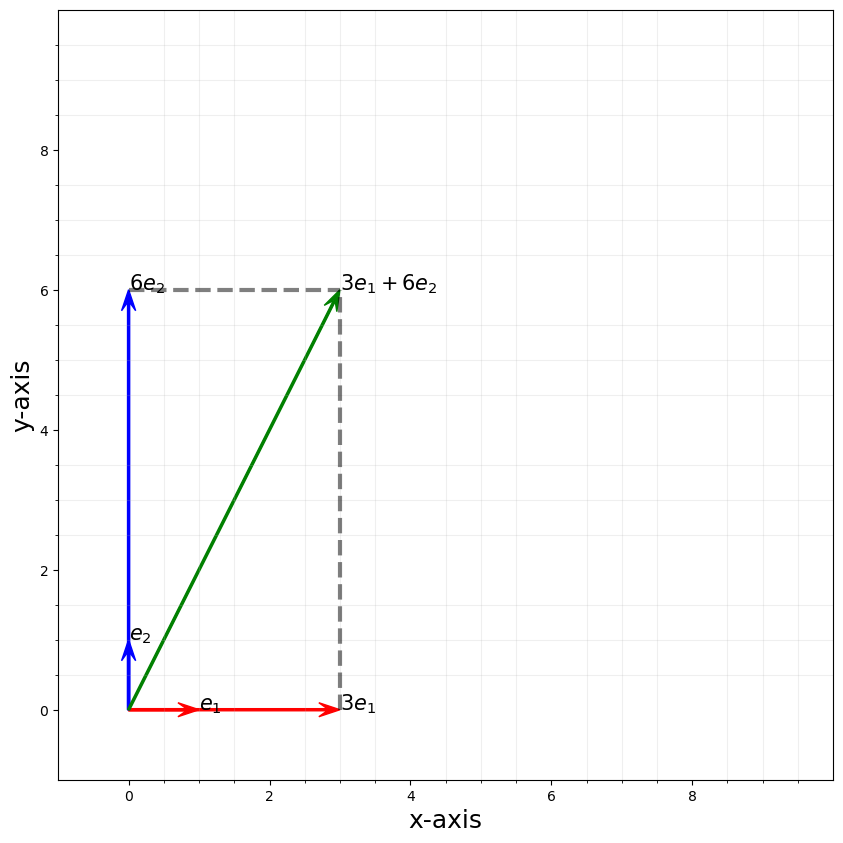

In [3]:
fig, ax = plt.subplots(figsize = (10, 10))

arrows = np.array([[[0,0,1,0]],
                  [[0,0,0,1]],
                  [[0,0,3,0]],
                  [[0,0,0,6]],
                  [[0,0,3,6]]])

colors = ['r','b','r','b','g']
for i in range(arrows.shape[0]):
    X,Y,U,V = zip(*arrows[i,:,:])
    ax.arrow(X[0], Y[0], U[0], V[0], color = colors[i], width = .03, 
             length_includes_head = True,
             head_width = .2, # default: 3*width
             head_length = .3,
             overhang = .4)

############################Dashed##################################
line1 = np.array([[3, 0], [3, 6]])
ax.plot(line1[:,0], line1[:,1], ls = '--', lw = 3, color = 'black', alpha = .5)

line2 = np.array([[0, 6], [3, 6]])
ax.plot(line2[:,0], line2[:,1], ls = '--', lw = 3, color = 'black', alpha = .5)

############################Text#####################################

ax.text(0, 1, '$e_2$', size = 15)
ax.text(1, 0, '$e_1$', size = 15)

ax.text(0, 6, '$6e_2$', size = 15)
ax.text(3, 0, '$3e_1$', size = 15)

ax.text(3, 6, '$3e_1+6e_2$', size = 15)

###########################Grid Setting##############################
# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 10, 2)
minor_ticks = np.arange(0, 10, .5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

#######################################################################
ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.axis([-1, 10, -1, 10])
ax.grid()
plt.show()

但非标准基座标是我们主要使用的，我们可以展示 $(2, 1)$ 和 $(-1, 2)$ 是 $\mathbb{R}^2$ 的一组基座标。

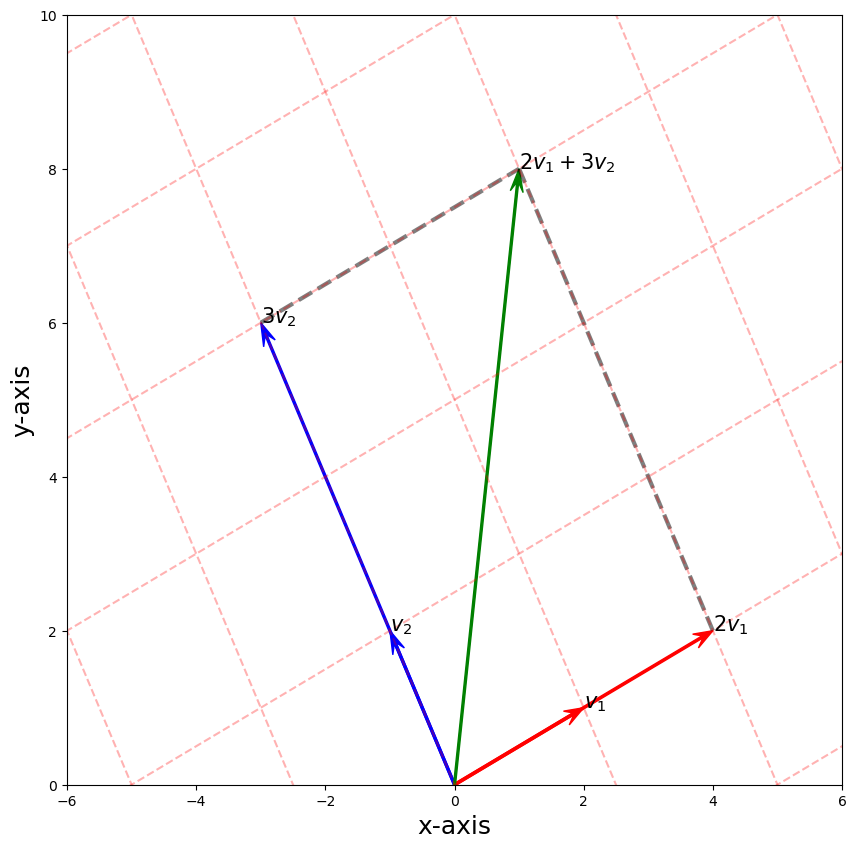

In [4]:
fig, ax = plt.subplots(figsize = (10, 10))

v1 = np.array([2, 1])
v2 = np.array([-1, 2])
v1m2 = 2*v1
v2m3 = 3*v2

arrows = np.array([[[0, 0, v1[0], v1[1]]],
               [[0, 0, v2[0], v2[1]]],
               [[0, 0, 2*v1[0], 2*v1[1]]],
               [[0, 0, 3*v2[0], 3*v2[1]]],
               [[0, 0, (v1m2+v2m3)[0],(v1m2+v2m3)[1]]]])

colors = ['r','b','r','b','g']
for i in range(arrows.shape[0]):
    X,Y,U,V = zip(*arrows[i,:,:])
    ax.arrow(X[0], Y[0], U[0], V[0], color = colors[i], width = .03, 
             length_includes_head = True,
             head_width = .2, # default: 3*width
             head_length = .3,
             overhang = .4)

# ############################ Dashed ##################################

point1 = [v2m3[0], v2m3[1]]
point2 = [v2m3[0]+v1m2[0], v2m3[1]+v1m2[1]]
line = np.array([point1, point2])
ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'black', alpha = .5)

point1 = [v1m2[0], v1m2[1]]
point2 = [v2m3[0]+v1m2[0], v2m3[1]+v1m2[1]]
line = np.array([point1, point2])
ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'black', alpha = .5)

############################Text#####################################

ax.text(2, 1, '$v_1$', size = 15)
ax.text(-1, 2, '$v_2$', size = 15)

ax.text(v1m2[0],v1m2[1], '$2v_1$', size = 15)
ax.text(v2m3[0],v2m3[1], '$3v_2$', size = 15)

ax.text(v1m2[0]+v2m3[0],v1m2[1]+v2m3[1], '$2v_1+3v_2$', size = 15)
############################## Grid ###############################

t = np.linspace(-6, 6)
for k in range(-6, 7):
    x = 2*k - t
    y = k + 2*t
    ax.plot(x, y, ls = '--', color = 'red', alpha = .3)

for k in range(-6, 7):
    x = -k+2*t
    y = 2*k+t
    ax.plot(x, y, ls = '--', color = 'red', alpha = .3)

#######################################################################
ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.axis([-6,6, 0, 10]) # np.linalg.norm(v1m2+v2m3) is intercept
plt.show()

无论基座标是标准的还是非标准的，只要它们是线性无关的，它们就可以张成 $\mathbb{R}^2$。

## <font face="gotham" color="purple"> $\mathbb{R}^3$的基</font>

接下来我们展示 $\mathbb{R}^3$ 的标准基底和一个非标准基底。

在 $\mathbb{R}^3$ 中的标准基底是

$$
(e_1, e_2, e_3)=
\left[
\begin{matrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{matrix}
\right]
$$

我们可以展示一个向量 $(2,3,4)$ 在 $\mathbb{R}^3$ 中是它们的线性组合。我们在第 6 讲中进行了一个 3D 线性组合图，这里我们只是通过在笔记顶部导入模块来重新生成它。

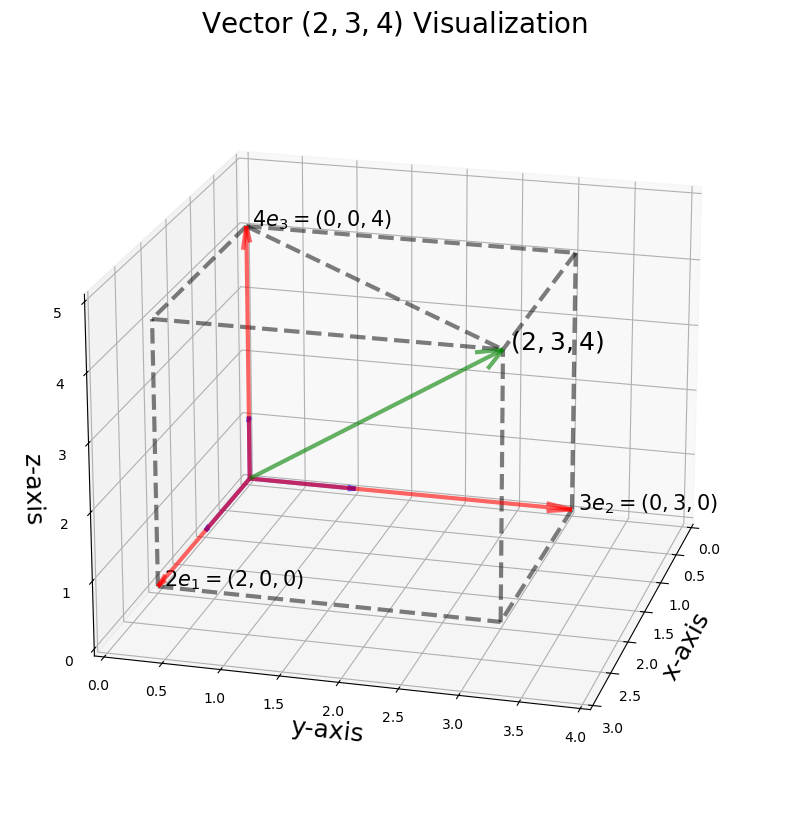

In [5]:
linAlgVis.linearCombo(2,3,4)

我们可以展示一个向量 $(2,3,4)$ 在 $\mathbb{R}^3$ 中是它们的线性组合。我们在第 6 讲中进行了一个 3D 线性组合图，这里我们只是通过在笔记顶部导入模块来重新生成它。

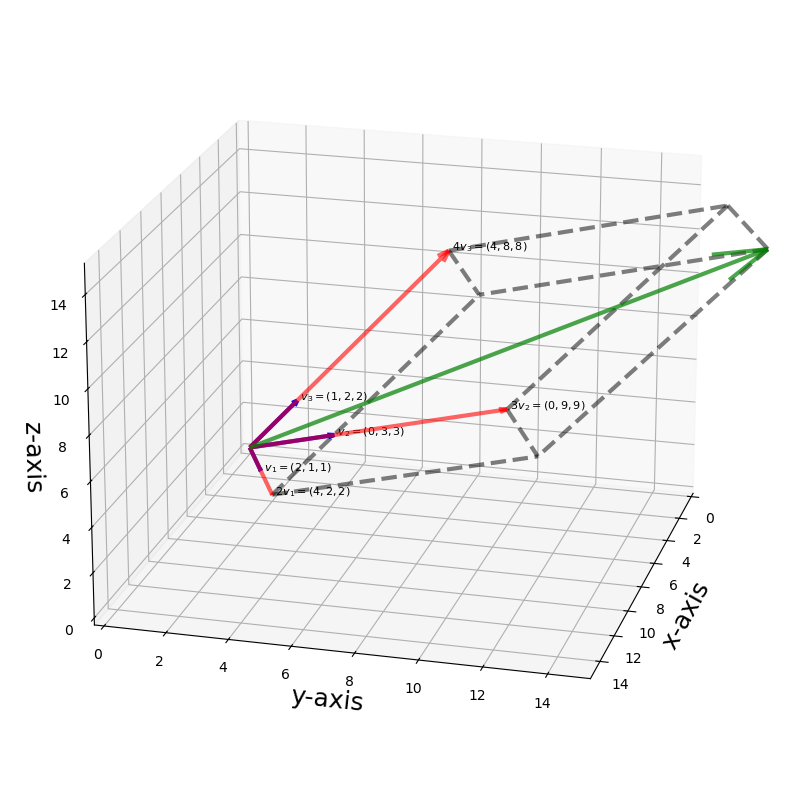

In [6]:
a, b, c = 2, 3, 4
vec1 = np.array([2,1,0])
vec2 = np.array([0,3,1])
vec3 = np.array([1,2,3])
linAlgVis.linearComboNonStd(2,3,4, vec1, vec2, vec3)

# <font face="gotham" color="purple"> 维度</font>

如果 $B$ 是 $V$ 的基底，则 $B$ 中向量的**数量**是 $V$ 的**维度**，记作 $\text{dim}(V)$。

<font size = 3 face="gotham"> 定理  1</font>

设 $B$ 是 $V$ 的基底，$B$ 有 $n$ 个向量，$T$ 是 $V$ 中的一组向量，如果 $T$ 中有 $p$ 个向量，且 $p>n$，那么 $T$ 必定是线性相关的。

<font size = 3 face="gotham"> 定理  2</font>

如果 $B$ 和 $T$ 都是 $V$ 的基底，则 $B$ 和 $T$ 必须具有相同数量的向量，即 $\text{dim}(V)$。

<font size = 3 face="gotham"> 定理  3</font>

如果 $\text{dim}(V) = n$，并且 $S$ 是 $V$ 中具有 $n$ 个线性无关向量的集合，则 $\text{span}(S)=V$。

<font size = 3 face="gotham" > 定理  4</font>

设 $v_1, v_2, ...,v_n$ 是向量空间 $V$ 中的一组向量，并且令 $W = \text{span}\{v_1,v_2,...,v_n\}$。如果 $v_n$ 是 $v_1, v_2,...v_{n-1}$ 的线性组合，则 $W = \text{span}\{v_1,v_2,...,v_{n-1}\}$。

这些定理不言自明，无需记忆，理解它们的最佳方式是在脑海中用 $\mathbb{R}^3$ 可视化它们。

# <font face="gotham" color="purple"> 列空间</font>

矩阵的列空间被表示为 $\text{Col}A$，它是由矩阵的所有列张成的空间。

 <font size = 4 face="gotham" color="purple">重要事实 </font>

行操作不会改变矩阵列的线性相关性。

假设我们有一个矩阵 $A$

In [7]:
A = sy.Matrix([[1, -2, -1, 3, 0], [-2, 4, 5, -5, 3], [3, -6, -6, 8, 2]]);A

⎡1   -2  -1  3   0⎤
⎢                 ⎥
⎢-2  4   5   -5  3⎥
⎢                 ⎥
⎣3   -6  -6  8   2⎦

执行 ```rref``` 操作，并保留 $\text{Col}A$ 的线性相关性。

In [8]:
A.rref()

⎛⎡1  -2  0  10/3  0⎤           ⎞
⎜⎢                 ⎥           ⎟
⎜⎢0  0   1  1/3   0⎥, (0, 2, 4)⎟
⎜⎢                 ⎥           ⎟
⎝⎣0  0   0   0    1⎦           ⎠

第 $2$ 和第 $4$ 列是其他向量的线性组合，可以安全地删除它们而不影响列空间。因此 $\text{Col}A$ 是

In [27]:
ColA = sy.Matrix([[1, -1,  0], [-2,  5,  3], [3, -6, 2]]); ColA

⎡1   -1  0⎤
⎢         ⎥
⎢-2  5   3⎥
⎢         ⎥
⎣3   -6  2⎦

## <font face="gotham" color="purple"> 列空间不相同</font>

你是否注意到我们说 $\text{Col}A$ 的依赖性不受行操作的影响时有一个陷阱，然而我们没有说列空间在行操作前后是相同的。

实际上，它们永远不可能是相同的。

考虑矩阵 $A$：

In [9]:
A = sy.Matrix([[3, -1, -1],[2, 4, 4], [-1, 1, 1]]); A

⎡3   -1  -1⎤
⎢          ⎥
⎢2   4   4 ⎥
⎢          ⎥
⎣-1  1   1 ⎦

如果我们执行 ```rref```，$A$ 变成了 $B$。显然它们的列空间是不同的。

In [10]:
B = A.rref(); B

⎛⎡1  0  0⎤        ⎞
⎜⎢       ⎥        ⎟
⎜⎢0  1  1⎥, (0, 1)⎟
⎜⎢       ⎥        ⎟
⎝⎣0  0  0⎦        ⎠

现在列出它们列空间的基底：$\text{Col}A$ 和 $\text{Col}B$ 是否相同？

$$
\text{col}(A)=\text{span}\left\{\left[ \matrix{3\cr 2\cr -1}\right],\ \left[\matrix{-1\cr 4\cr 1}\right]\right\}
$$
$$
\text{col}(B)=\text{span}\left\{\left[ \matrix{1\cr 0\cr 0}\right],\ \left[\matrix{0\cr 1\cr 0}\right]\right\}
$$

很容易将它们可视化，它们是两个相交的平面。

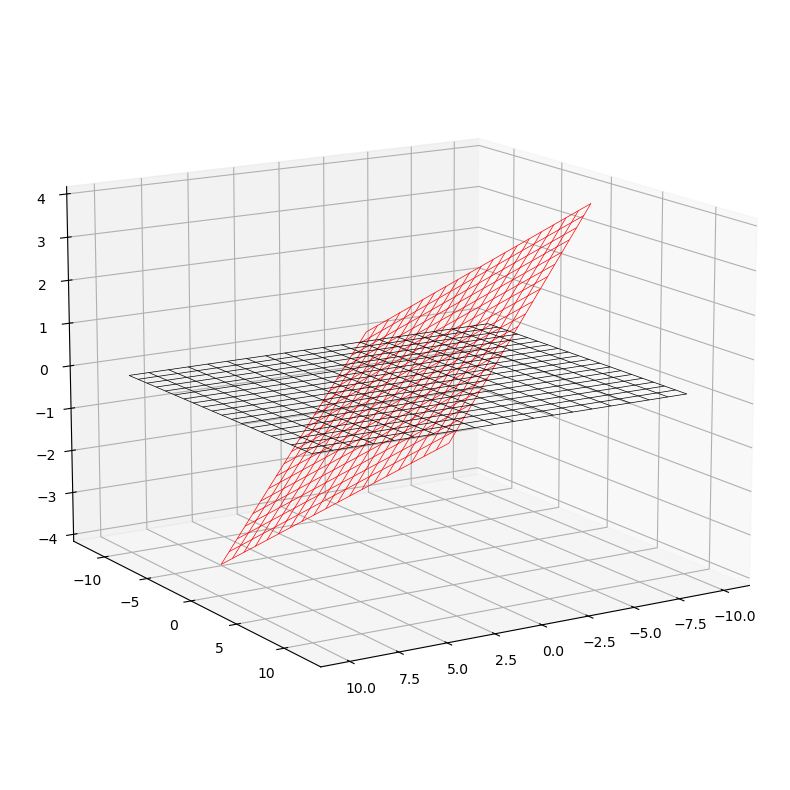

In [11]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

s = np.linspace(-2, 2, 20)
t = np.linspace(-2, 2, 20)
S, T = np.meshgrid(s, t)

X = 3*S - T
Y = 2*S + 4*T
Z = -S + T
ax.plot_wireframe(X, Y, Z, linewidth = .5, color = 'r')

s = np.linspace(-10, 10, 20)
t = np.linspace(-10, 10, 20)
S, T = np.meshgrid(s, t)
X = S
Y = T
Z = np.zeros(S.shape)
ax.plot_wireframe(X, Y, Z, linewidth = .5, color = 'k')
ax.view_init(elev=14, azim=58)

## <font face="gotham" color="purple">找到 $\mathbb{R}^n$ 的基底的方法</font>

考虑矩阵 $A_{4\times 2}$，找到 $\mathbb{R}^4$ 的基底。

请注意，我们只有两个列向量，不可能张成 $\mathbb{R}^4$。常见的方法是使用另外两个标准基向量与 $A$ 相结合，形成 $\mathbb{R}^4$ 的基底。

In [12]:
A = sy.randMatrix(4, 2);A

⎡50  22⎤
⎢      ⎥
⎢74  67⎥
⎢      ⎥
⎢29  56⎥
⎢      ⎥
⎣99  72⎦

In [13]:
I = sy.eye(4);I

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

将矩阵水平方向连接。

In [14]:
Aug = A.row_join(I);Aug# concatenate 

⎡50  22  1  0  0  0⎤
⎢                  ⎥
⎢74  67  0  1  0  0⎥
⎢                  ⎥
⎢29  56  0  0  1  0⎥
⎢                  ⎥
⎣99  72  0  0  0  1⎦

In [15]:
Aug.rref()

⎛⎡1  0  0  0  -1/48  7/432 ⎤              ⎞
⎜⎢                         ⎥              ⎟
⎜⎢              11    -29  ⎥              ⎟
⎜⎢0  1  0  0   ───    ──── ⎥              ⎟
⎜⎢             384    3456 ⎥              ⎟
⎜⎢                         ⎥              ⎟
⎜⎢              79   -1081 ⎥, (0, 1, 2, 3)⎟
⎜⎢0  0  1  0   ───   ──────⎥              ⎟
⎜⎢             192    1728 ⎥              ⎟
⎜⎢                         ⎥              ⎟
⎜⎢            -145   -2201 ⎥              ⎟
⎜⎢0  0  0  1  ─────  ──────⎥              ⎟
⎝⎣             384    3456 ⎦              ⎠

因此增广矩阵的前 4 列是一个基底。

In [17]:
Aug[:,0:4]

⎡45  33  1  0⎤
⎢            ⎥
⎢79  19  0  1⎥
⎢            ⎥
⎢45  75  0  0⎥
⎢            ⎥
⎣3   27  0  0⎦

# <font face="gotham" color="purple"> 基底的变换</font>

基底的变换是用于改变坐标系，例如，从笛卡尔坐标系到其他坐标系。

## <font face="gotham" color="purple"> 坐标向量</font>

我们有一个基底 $B=\{b_1, b_2\}$，$B$ 的**坐标向量**记作 $\big[v\big]_B$。如果

$$
b_1 = \left[\begin{matrix}1\\1 \end{matrix}\right]\\
b_2 = \left[\begin{matrix}-2\\1 \end{matrix}\right]\\
\big[v\big]_B = \left[\begin{matrix}2\\3 \end{matrix}\right]
$$

然后通过使用基底和其坐标向量来计算 $v$。我们希望将 $\big[v\big]_B$ 转换为一对笛卡尔坐标。

In [16]:
P = sy.Matrix([[1,-2],[1,1]]); P

⎡1  -2⎤
⎢     ⎥
⎣1  1 ⎦

In [17]:
v_B = sy.Matrix([[2], [3]]); v_B

⎡2⎤
⎢ ⎥
⎣3⎦

In [18]:
P*v_B

⎡-4⎤
⎢  ⎥
⎣5 ⎦

现在我们已经成功地将 $\big[v\big]_B$ 转换为笛卡尔坐标。

相反地，如果我们知道 $v$ 即笛卡尔坐标，我们想找到 $\big[v\big]_B$，例如

$$
v = \left[\begin{matrix}-1\\-4 \end{matrix}\right]
$$

那么我们可以将问题表述为:

$$
\left[\begin{matrix}1 & -2\\1 & 1\end{matrix}\right]
\left[\begin{matrix}b_1\\b_2 \end{matrix}\right]=
\left[\begin{matrix}-1\\-4 \end{matrix}\right]
$$

只需解线性系统

In [19]:
Aug = sy.Matrix([[1,-2,-1],[1,1,-4]])
Aug.rref()

⎛⎡1  0  -3⎤        ⎞
⎜⎢        ⎥, (0, 1)⎟
⎝⎣0  1  -1⎦        ⎠

我们得到 $\big[v\big]_B = (-3, -1)^T$.

## <font face="gotham" color="purple"> 基底的变换</font>

最有可能的情况是，我们想要从 $\big[v\big]_B$ 转换为 $\big[v\big]_C$，它们都不是笛卡尔坐标。

假设我们在 $\mathbb{R}^2$ 中有两个基底 $B=\{b_1,\ b_2\}$ 和 $C=\{c_1,\ c_2\}$。

$$
b_1=
\left[\begin{matrix}2\\1 \end{matrix}\right],\quad
b_2 = 
\left[\begin{matrix}-1\\1 \end{matrix}\right]\\
c_1=
\left[\begin{matrix}1\\1 \end{matrix}\right],\quad
c_2 = 
\left[\begin{matrix}-3\\1 \end{matrix}\right]\\
$$

我们想要将 $\big[v\big]_B$ 转换为 $\big[v\big]_C$。形式上，这可以重新表述为找到**过渡矩阵** $P_{C\leftarrow B}$。

首先我们找到 $b_1$ 和 $b_2$ 在 $C$ 基底下的坐标向量：$b_1 = xc_1+yc_2$，$b_2 = xc_1+yc_2$。

$$
\left[\begin{matrix}2\\1 \end{matrix}\right] = x\left[\begin{matrix}1\\1 \end{matrix}\right]+y\left[\begin{matrix}-3\\1 \end{matrix}\right]= \left[\begin{matrix}1 & -3\\1 &1 \end{matrix}\right]\left[\begin{matrix}x \\y \end{matrix}\right]\\
\left[\begin{matrix}-1\\1 \end{matrix}\right] = x\left[\begin{matrix}1\\1 \end{matrix}\right]+y\left[\begin{matrix}-3\\1 \end{matrix}\right]=\left[\begin{matrix}1 & -3\\1 &1 \end{matrix}\right]\left[\begin{matrix}x \\y \end{matrix}\right]\\
$$

提取两个系统的增广矩阵：

$$
\left[\begin{matrix}1 & -3 & 2\\1 &1 &1 \end{matrix}\right]\\
\left[\begin{matrix}1 & -3 & -1\\1 &1 &1 \end{matrix}\right]
$$

它们可以合并成一个增广矩阵 $[C|B]$

$$
\left[\begin{matrix}1 & -3  & 2 & -1\\1 &1 &1 &1 \end{matrix}\right]
$$

In [20]:
Aug = sy.Matrix([[1,-3,2,-1],[1, 1, 1, 1]])
Aug.rref()

⎛⎡1  0  5/4   1/2⎤        ⎞
⎜⎢               ⎥, (0, 1)⎟
⎝⎣0  1  -1/4  1/2⎦        ⎠

增广矩阵的最后两列就是 $P_{C\leftarrow B}$。

一般来说，我们可以通过使用

$$[\ C\ |\ B\ ]\longrightarrow [\ I\ |\ P_{C\leftarrow B}\ ]$$

### <font face="gotham" color="purple"> 一个例子</font>

让 

$$
B=\left\{\left[\begin{array}{l}
1 \\
1 \\
0
\end{array}\right],\left[\begin{array}{l}
0 \\
1 \\
1
\end{array}\right],\left[\begin{array}{l}
0 \\
1 \\
0
\end{array}\right]\right\} \quad \text { 和 } \quad C=\left\{\left[\begin{array}{l}
1 \\
1 \\
2
\end{array}\right],\left[\begin{array}{l}
2 \\
1 \\
1
\end{array}\right],\left[\begin{array}{l}
1 \\
0 \\
1
\end{array}\right]\right\}
$$

是 $\mathbb{R}^3$ 的两个基底，找到 $P_{C\leftarrow B}$，并给定 $\big[v\big]_B = (1,-1,2)$，找到 $\big[v\big]_C$。

构造增广矩阵：

In [22]:
v_B =  sy.Matrix([1, -1, 2])
B = sy.Matrix([[1, 0, 0], [1, 1 ,1], [0, 1, 0]])
C = sy.Matrix([[1, 2, 1], [1, 1 ,0], [2, 1, 1]])
Aug = C.row_join(B); Aug# concatenate 

⎡1  2  1  1  0  0⎤
⎢                ⎥
⎢1  1  0  1  1  1⎥
⎢                ⎥
⎣2  1  1  0  1  0⎦

如上所示，rref 的右侧矩阵块是 $P_{C\leftarrow B}$。

In [23]:
Aug_rref = Aug.rref();Aug_rref

⎛⎡1  0  0  0   1   1/2 ⎤           ⎞
⎜⎢                     ⎥           ⎟
⎜⎢0  1  0  1   0   1/2 ⎥, (0, 1, 2)⎟
⎜⎢                     ⎥           ⎟
⎝⎣0  0  1  -1  -1  -3/2⎦           ⎠

In [24]:
v_C = Aug_rref[0][:,3:6]*v_B; v_C

⎡0 ⎤
⎢  ⎥
⎢2 ⎥
⎢  ⎥
⎣-3⎦

$\big[v\big]_C$ 是 $(0, 2, -3)$。